In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import webbrowser
 
%matplotlib inline

## read and describe the metadata

In [2]:
fpn_csv = '/Users/animatevosian/Desktop/ml/final_assignment_3/option_2/cluster_images.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [3]:
# get column names
list(data)

['s_no',
 'artist',
 'title',
 'art_movement',
 'museum_venue',
 'country_of_origin',
 'has_text',
 'primary_medium',
 'medium',
 'work_size',
 'date',
 'representation',
 'representation_semi',
 'kinetic',
 'map',
 'map2',
 'spatial_dimension',
 'spatial_dimension2',
 'pl',
 'si',
 'va',
 'te',
 'co',
 'or',
 'sh',
 'reflection',
 'po',
 'li',
 'ar',
 'notes']

In [4]:
data.head()

,s_no,artist,title,art_movement,museum_venue,country_of_origin,has_text,primary_medium,medium,work_size,...,va,te,co,or,sh,reflection,po,li,ar,notes
0,2,Giorgio de Chirico,The Uncertainty of the Poet,surrealism,Tate,Italy,False,painting,"painting, oil on canvas",106 x 94 cm,...,3,0,0,4,3,False,0,0,5,"distorted perspective, shadow, signification o..."
1,3,Giovanni Anselmo,Direction,arte povera,Tate,Italy,False,sculpture,"sculpture, fabric, glass & metal",24 x 420 x 335 cm,...,1,3,0,3,2,False,0,0,5,"hard to understand the viewpoint, sense of for..."
2,4,Milton Avery,Yellow Sky,modernism,Tate,America,False,painting,"painting, oil on canvas",156 x 184 cm,...,2,4,4,2,4,False,0,0,5,"flatish, textured shapes & specific colors-lin..."
3,5,Gillian Avery,Distillation,abstraction,Tate,UK,False,painting,"painting, oil, household paint on hardboard",213 x 152 cm,...,1,2,0,2,4,False,0,0,5,"shapes, layers, paint handlng/texture, orienta..."
4,6,Joseph (Jef) Banc,Pair-Bearing Matrix,abstraction,Tate,France,False,painting,"painting, mixed media on canvas",73 x 60 cm,...,1,4,1,0,4,False,0,0,5,"ambiguity through abstraction, odd shape, v te..."


## create a subset of the columns you will use to fit KMeans

<!-- Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](https://infovis-wiki.net/wiki/Visual_Variables). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/option_2/contents-of-cluster_images.csv).  -->

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 
I chose the following variables:
 

- **representation**: indicates the work represents some aspect of reality, =TRUE if the work is **very** representational
- **representation_semi**: indicates the work represents some aspect of reality, =TRUE if the work is **somewhat** representational
- **kinetic**: indicates the work moves or has movement	
- **ar**: An AREA signifies something on the plane that has a measurable size. This signification applies to the entire area covered by the visible mark.	
- **te**: variation in the fineness or coarseness of an area having a given value; includes blur	
- **spatial_dimension**: indicates the work is an object that is occupying physical space in more than 2 dimensions (height in addition to length and width), where =TRUE if work is the work is **strongly** spatial
- **spatial_dimension2**: indicates the work is an object that is occupying physical space in more than 2 dimensions (height in addition to length and width), where =TRUE if work is the work is **somewhat** spatial
- **art_movement**: name of art movement	

 I wanted to approach clustering the artworks in a comprehensive way, by including diverse artistic qualities. "Representation" and "Representation_semi" gauge the degree of realism, aiding in grouping artworks with shared themes and visual styles. "Kinetic" identifies artworks with movement, potentially grouping pieces with similar energy. "Ar" which focuses on the area, and “Te” which focuses on variation in texture, contributes to clustering based on spatial composition and aesthetic features of the art. "Spatial Dimension" and "Spatial Dimension2" distinguish artworks by their physical presence, allowing for clustering based on sculptural or installation qualities. Together, these variables offer a broad view of artistic characteristics, enabling the identification of cohesive clusters based on shared themes, composition, visual qualities, techniques, and spatial elements. 

In [5]:
# X = data[['va', 'si','te','po','li','sh','or','representation','representation_semi']] #lots of visually similar ones
X = data[['representation_semi','representation','art_movement','kinetic','ar','te','spatial_dimension2','spatial_dimension']] ##- 4/ 7 / 24


In [6]:
X.head()

,representation_semi,representation,art_movement,kinetic,ar,te,spatial_dimension2,spatial_dimension
0,False,True,surrealism,False,5,0,False,False
1,False,True,arte povera,False,5,3,False,True
2,False,True,modernism,False,5,4,False,False
3,False,False,abstraction,False,5,2,True,False
4,False,False,abstraction,False,5,4,False,False


# KMeans

In [7]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default valu

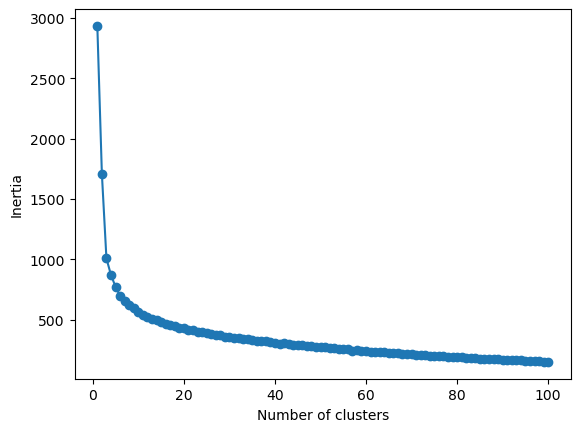

In [8]:
X = pd.get_dummies(X) #assigns number to categories
#elbow is around 20
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 101):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 101), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [9]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [5, 10, 12, 15,20]
#change cluster values we want to see

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.28148142652540803


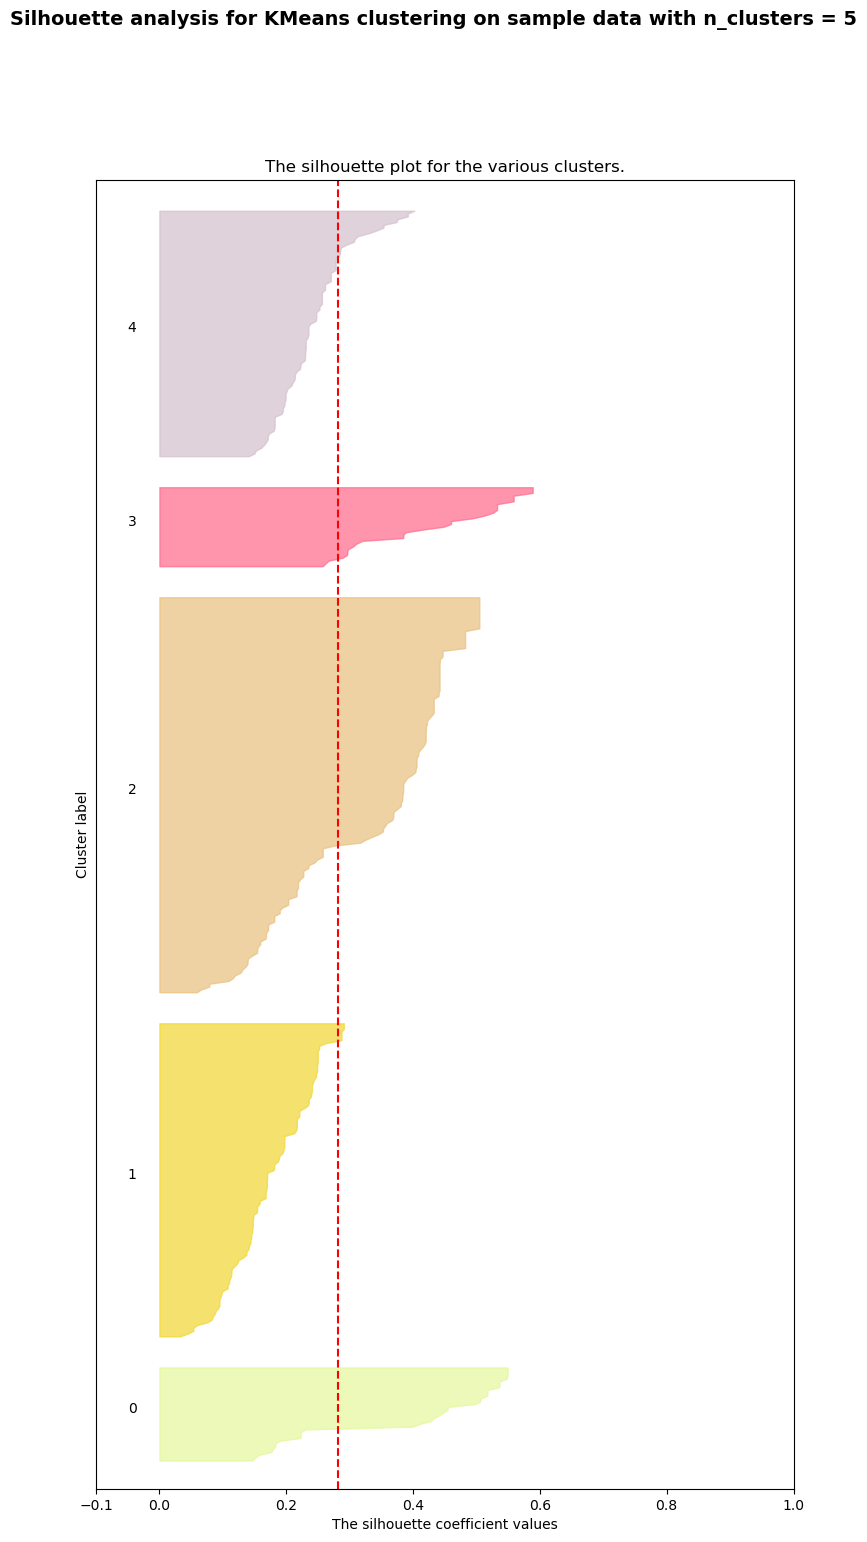

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.2194680642287677


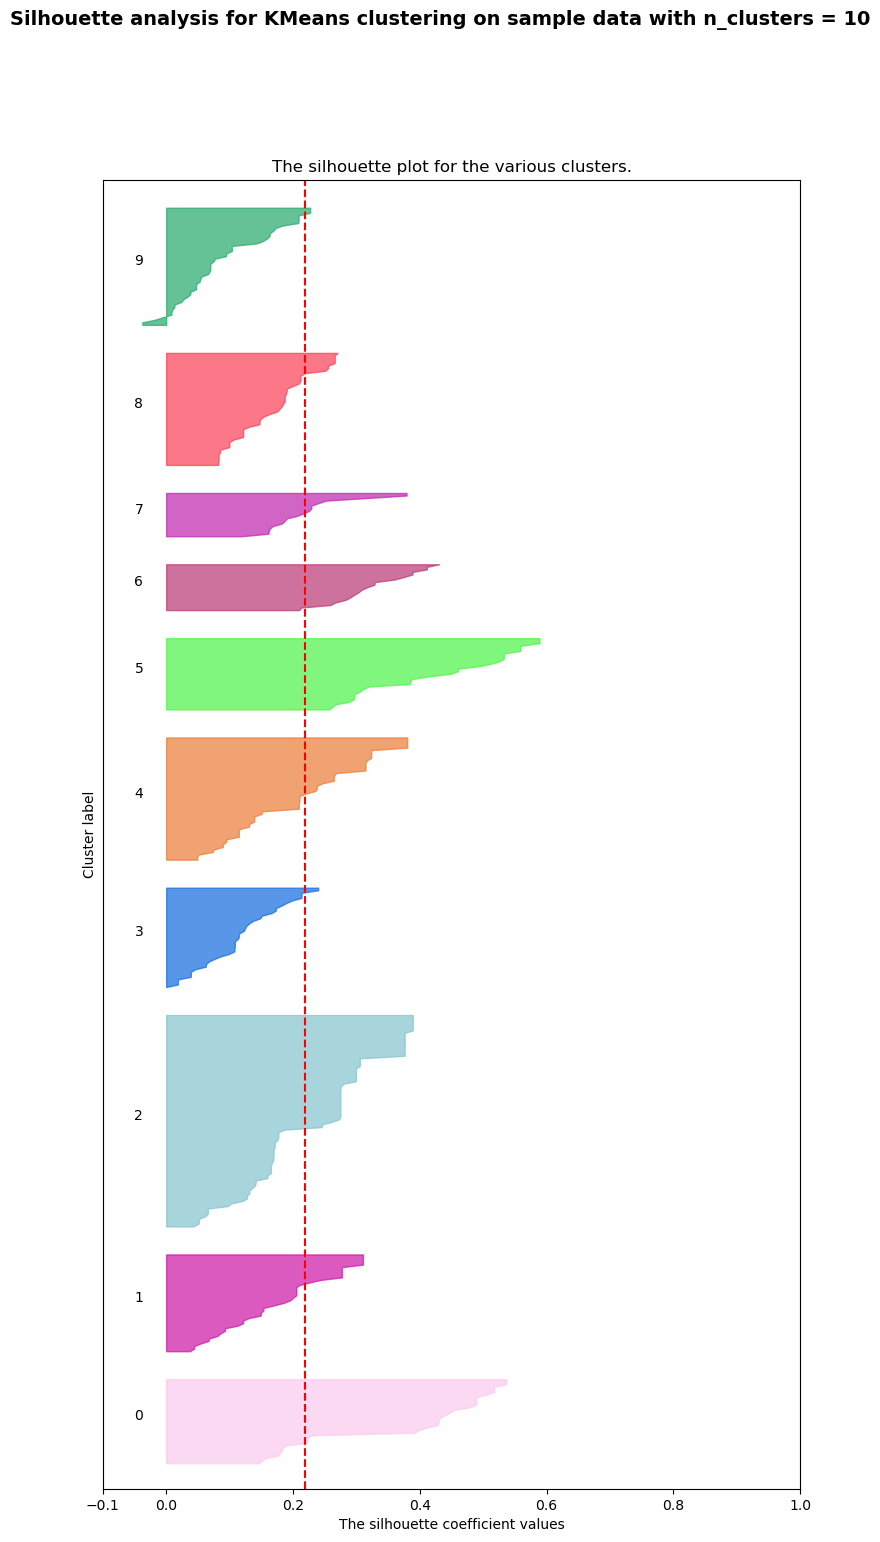

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 12 The average silhouette_score is : 0.22523896170399677


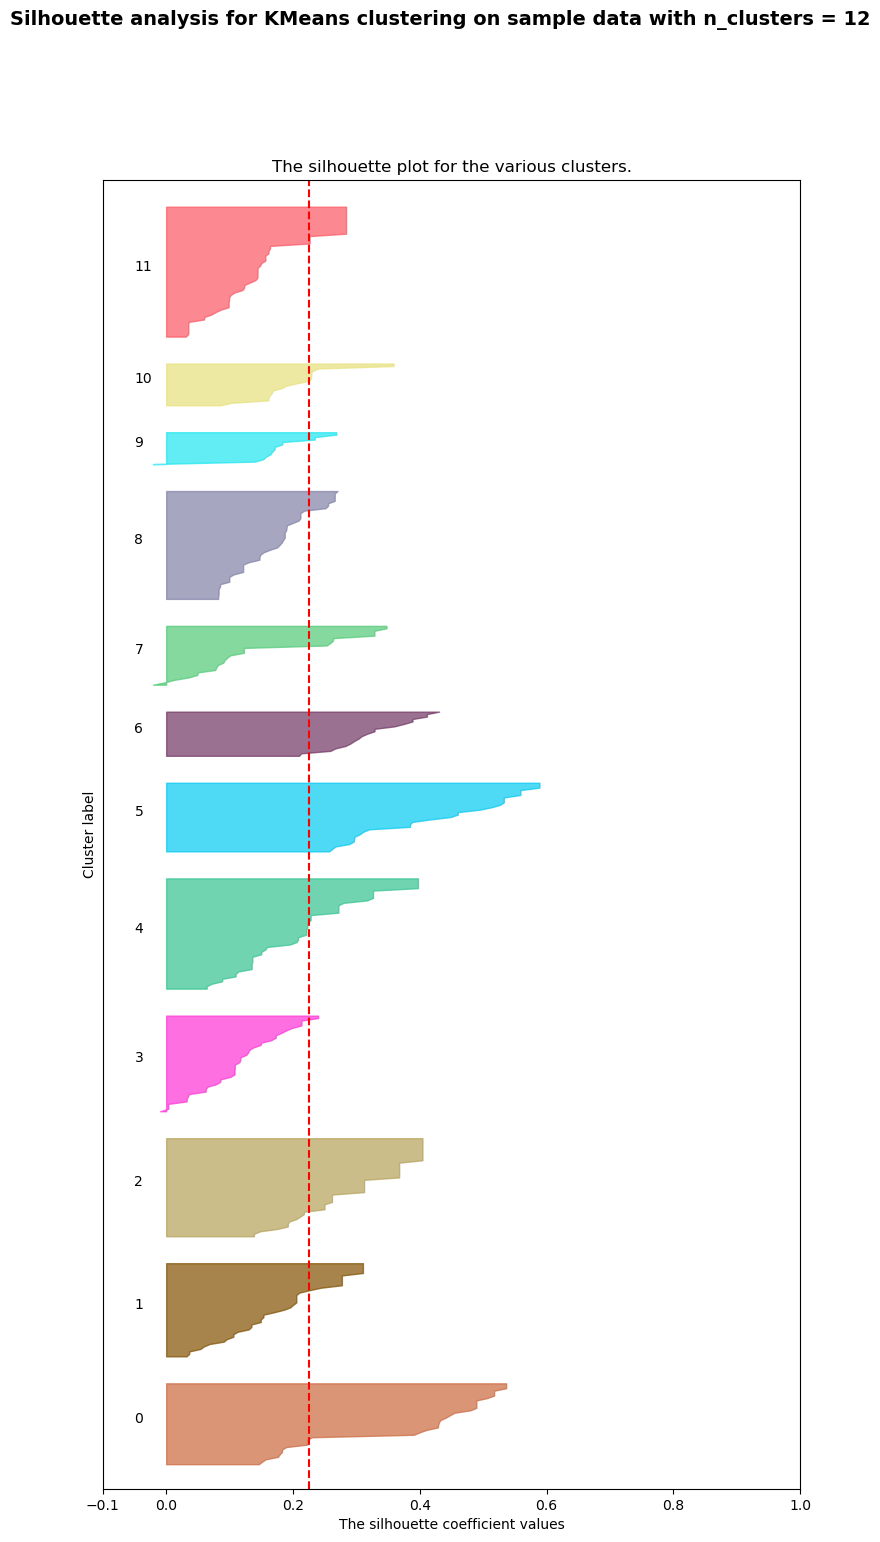

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 15 The average silhouette_score is : 0.20923741780298213


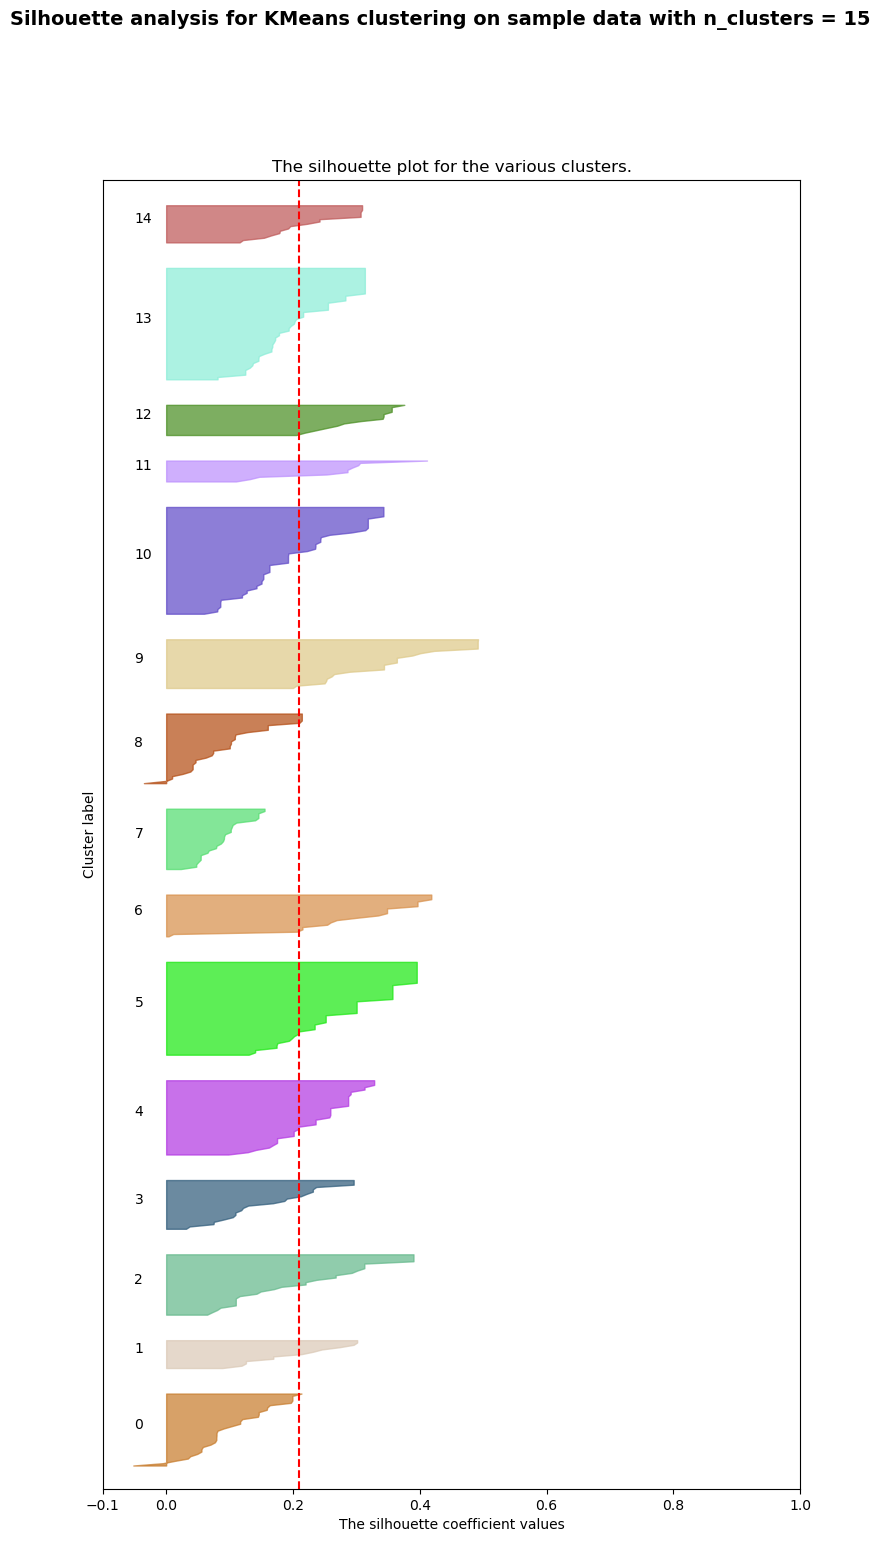

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 20 The average silhouette_score is : 0.2407501897947075


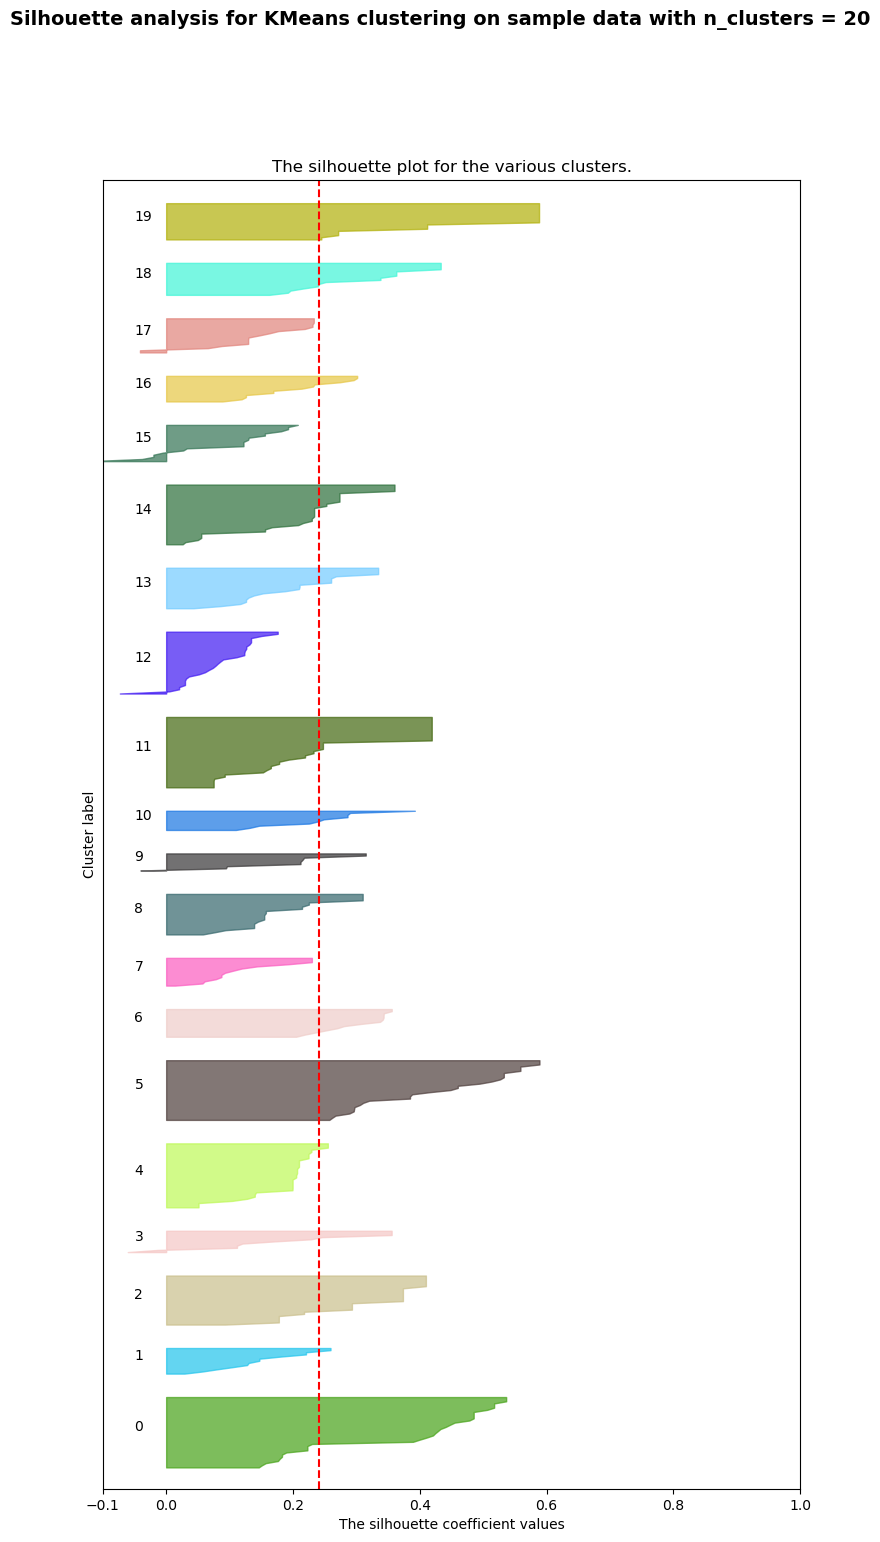

In [10]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. 
10 appears to be a good amount of clusters for the features I chose, as deduced from the elbow graph.

In [11]:
# set the number of clusters in the final model

my_n_clusters = 12

In [12]:
km = KMeans(n_clusters=my_n_clusters)
km.fit(X)

/Users/animatevosian/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=12)

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

## 

## Results 
### Resulting clusters are visualized in a grid with some metadata, and output both below and as an html file that can be viewed separately (stored in the same folder as this notebook). 

In [13]:
num_images_per_row = 5  # Number of images to display per row in the grid

with open("clusters_visualization.html", "w") as f:
    f.write("<html><head><title>Clusters Visualization</title></head><body>")
    
    for i in range(0, max(km.labels_)+1):
        f.write("<div>")
        f.write("<h2>Images in cluster: " + str(i) + "</h2>")
        
        # Start grid layout
        f.write("<div style='display:flex; flex-wrap:wrap;'>")
        
        count = 0  # Counter to keep track of the number of images in the current row
        
        for j in range(0, len(km.labels_)):
            if km.labels_[j] == i:
                img_path = "img_small/" + str(j+2) + '_small.jpg'
                f.write("<div style='flex:1; padding:5px;'>")
                f.write("<img src='" + img_path + "' style='max-width:150px; max-height:150px;'>")
                f.write("<p>Cluster: " + str(i) + "</p>")
                f.write("<p>Artist: " + str(data.loc[j, 'artist']) + "</p>")
                f.write("<p>Title: " + str(data.loc[j, 'title']) + "</p>")
                f.write("<p>Medium: " + str(data.loc[j, 'medium']) + "</p>")
                f.write("</div>")
                
                count += 1
                
                # Check if reached the maximum number of images per row
                if count == num_images_per_row:
                    f.write("<br>")  # Start a new row
                    count = 0  # Reset the counter
        
        # End grid layout
        f.write("</div>")
        
        f.write("</div>")
    
    f.write("</body></html>")

    f.close()
    
# webbrowser.get("chrome")
# webbrowser.open_new_tab("clusters_visualization.html")

from IPython.display import HTML
HTML(filename="clusters_visualization.html")

## original output code below to view clusters ###


In [16]:
# for i in range(0, max(km.labels_)+1):
#     print(" ")
#     print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
#     print("Images in cluster: " + str(i))
#     print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
#     for j in range(0, len(km.labels_)):
#         if km.labels_[j] == i:
# #             print(str(j+2) + '_small.jpg') #CHANGE, SO IT PRINTS OUT HTML AND SHOWS IMAGE so we can scroll through images and make the assesment
#                 img_path = plt.imread("img_small/" + str(j+2) + '_small.jpg')
#                 plt.imshow(img_path)
#                 plt.show()
#                 print(i)
#                 print("Medium: ",data.loc[j, 'medium'])
#                 print("Title: ",data.loc[j,'title'])
#                 print("Artist: ", data.loc[j, 'artist'])

In [15]:
from IPython.display import display, HTML

for i in range(0, max(km.labels_)+1):
    display(HTML("<h2>Images in cluster: " + str(i) + "</h2>"))
    for j in range(0, len(km.labels_)):
        if km.labels_[j] == i:
            img_path = "img_small/" + str(j+2) + '_small.jpg'
            display(HTML("<img src='" + img_path + "'>"))
            print("Cluster:", i)
            print("Medium:", data.loc[j, 'medium'])
            print("Title:", data.loc[j,'title'])
            print("Artist:", data.loc[j, 'artist'])


Cluster: 0
Medium: painting, oil, household paint on hardboard
Title: Distillation
Artist: Gillian Avery


Cluster: 0
Medium: painting, oil on canvas
Title: Bottle and Fishes
Artist: Georges Braque


Cluster: 0
Medium: painting, oil on canvas
Title: Black Sea
Artist: Philip Guston


Cluster: 0
Medium: painting, pencil & aquacryl on canvas & aluminum
Title: Vapour
Artist: Shirazeh Houshiary


Cluster: 0
Medium: painting, ink & acrylic on canvas
Title: Black City 
Artist: Julie Mehretu


Cluster: 0
Medium: painting, oil, paper collage, glitter, polyester resin, map pins & elephant dung on linen
Title: Afrodizzia
Artist: Chris Ofili


Cluster: 0
Medium: painting, acrylic on canvas
Title: River Rocks Eroded
Artist: Gabriel Orozco


Cluster: 0
Medium: painting, oil paint on canvas on wood
Title: Seaton Delaval 
Artist: John Piper


Cluster: 0
Medium: painting, gold paint, oil & acrylic paint on canvas
Title: Untitled (Square 2)
Artist: Sigmar Polke


Cluster: 0
Medium: painting, oil on canvas
Title: Yellow Islands
Artist: Jackson Pollock


Cluster: 0
Medium: painting, oil on canvas
Title: White Screen 
Artist: Douglas Portway


Cluster: 0
Medium: print, lithograph on paper
Title: Water Stop 
Artist: Robert Rauschenberg


Cluster: 0
Medium: painting, oil on canvas
Title: Abstract Painting No. 5 
Artist: Ad Reinhardt


Cluster: 0
Medium: painting, 6 photographs, gelatin silver print on paper with oil paint
Title: Self Portrait Standing, Three Times, 17.3.1991
Artist: Gerhard Richter


Cluster: 0
Medium: painting, oil on canvas
Title: Bomb Falling into Water 
Artist: Leonard Rosoman


Cluster: 0
Medium: painting, watercolor & gouache on paper
Title: Untitled 
Artist: Mark Rothko


Cluster: 0
Medium: painting, oil on canvas
Title: Document 
Artist: Robert Ryman


Cluster: 0
Medium: painting oil on canvas
Title: The Mood of Now 
Artist: Yves Tanguy


Cluster: 0
Medium: print, fabric on etching on paper
Title: Pasted Cloth 
Artist: Antoni Tapies


Cluster: 0
Medium: painting, tempera & gouache on paper on board
Title: Northwest Drift
Artist: Mark Tobey


Cluster: 0
Medium: painting, watercolor on paper
Title: Untitled (The Barge)
Artist: Luc Tuymans


Cluster: 0
Medium: painting, silkscreen & acrylic on canvas
Title: Shadows, detail
Artist: Andy Warhol


Cluster: 0
Medium: painting, oil paint on canvas
Title: Nocturne: Blue and Silver - Cremorne Lights
Artist: James Abbott McNeill Whistler


Cluster: 0
Medium: painting, silkscreen ink on linen
Title: Untitled
Artist: Christopher Wool 


Cluster: 0
Medium: print, screenprint on paper
Title: Stage
Artist: Catherine Yass


Cluster: 0
Medium: photo, gelatin silver print
Title: Maquette du nuage #1
Artist: Yo-Yo Gonthier


Cluster: 0
Medium: painting, mixed media on silk-screen printed fabric
Title: Section 1, Les pÌ©troliers series
Artist: YÌ©anzi


Cluster: 0
Medium: drawing, red wash, red chalk on ivory laid paper
Title: Dos personajes asomÌÁndose a una salida luminosa
Artist: Francisco de Goya y Lucientes 


Cluster: 0
Medium: print, polymer gravure 
Title: Eagduru from Alan Cristea Gallery Twentieth Anniversary Portfolio
Artist: Ian McKeever


Cluster: 0
Medium: painting, acrylic emulsion paint on paper
Title: Untitled
Artist: Rosemarie Trockel


Cluster: 0
Medium: photo, video still 
Title: Washing Brain and Corn
Artist: Sung Hwan Kim


Cluster: 0
Medium: installation, handmade slide, projected in pairs
Title: Number 9
Artist: Luther Price


Cluster: 0
Medium: photo, color print on metallic paper
Title: Unique color print on metallic paper
Artist: Mariah Robertson


Cluster: 0
Medium: drawing, pastel on paper
Title: Untitled
Artist: Anish Kapoor


Cluster: 0
Medium: painting, synthetic polymer paint on paper
Title: Blue Band
Artist: Sarah Walker


Cluster: 0
Medium: photo, digital print with acrylic paint additions
Title: Bombhead
Artist: Bruce Connor


Cluster: 0
Medium: drawing, ink & graphite on mylar
Title: Everyone Belongs to Everyone Else
Artist: Matthew Ritchie 


Cluster: 0
Medium: drawing, ink & pencil on paper
Title: Third House for Edgar Hofschen #3
Artist: Jake Berthot


Cluster: 0
Medium: print, lithograph
Title: Untitled
Artist: Julius Bissier


Cluster: 0
Medium: print, serigraph, printed in color
Title: Spirit's Constellation
Artist: Sylvia Wald


Cluster: 0
Medium: painting, oil on canvas
Title: Man With a Guitar
Artist: Georges Braque


Cluster: 0
Medium: painting, watercolor & pencil on paper
Title: House Among Trees
Artist: Paul CÌ©zanne


Cluster: 0
Medium: photo, gelatin silver print
Title: BrÌÈlage
Artist: Raoul Ubac 


Cluster: 0
Medium: photo,
Title: nan
Artist: Amir Mousavi


Cluster: 1
Medium: painting, marker pen, acrylic on canvas
Title: Break Point 
Artist: Fiona Banner


Cluster: 1
Medium: drawing, crayon on paper
Title: Drawing, Untitled 
Artist: Jan Groth


Cluster: 1
Medium: sculpture, latex, rope, string, and wire
Title: No Title 
Artist: Eva Hesse


Cluster: 1
Medium: drawing, charcoal on paper
Title: Untitled 
Artist: Linda Karshan


Cluster: 1
Medium: painting, oil & glue on canvas
Title: From Line 
Artist: Lee Ufan


Cluster: 1
Medium: painting, acrylic on glass
Title: It's so green outside it is difficult to leave the window
Artist: Antoni Malinowski 


Cluster: 1
Medium: print, etching & aquatint on paper
Title: Cold Mountain Series, Zen Study 6
Artist: Brice Marden


Cluster: 1
Medium: drawing, oil pastel & photograph on paper
Title: Untitled (Death Mask)
Artist: Arnulf Rainer


Cluster: 1
Medium: print, lithograph on paper
Title: Self-Portrait as a Flower Pot
Artist: Dieter Roth


Cluster: 1
Medium: painting, nail polish & sharpie pen on card
Title: (Mapping) Maybelline å¨ Wet Shine Cherry Rain
Artist: Sterling Ruby


Cluster: 1
Medium: sculpture, sewing needles & silk thread
Title: Disremembered I
Artist: Doris Salcedo


Cluster: 1
Medium: sculpture, plastered cloth on wire
Title: Chair Transformation #7
Artist: Lucas Samaras


Cluster: 1
Medium: painting, acrylic & newspaper
Title: Untitled 
Artist: Shozo Shimamoto


Cluster: 1
Medium: drawing, thread embedded in cotton paper
Title: Karma Juggler
Artist: Do Ho Suh


Cluster: 1
Medium: sculpture, florist wire, nails & graphite
Title: 10th Wire Piece
Artist: Richard Tuttle 


Cluster: 1
Medium: painting, oil-based house paint, lead pencil, colored pencil, & pastel on canvas
Title: Academy 
Artist: Cy Twombly


Cluster: 1
Medium: sculpture, steel & aluminium
Title: 35å¡9,32å¡18
Artist: Richard Wentworth


Cluster: 1
Medium: painting, oil & alkyd resin on canvas
Title: Parallel Rendering 2
Artist: Terry Winters


Cluster: 1
Medium: print, etching & drypoint on paper
Title: [no title]
Artist: Wols (Alfred Otto Wolfgang Schulze)


Cluster: 1
Medium: print,
Title: no title on website
Artist: V. Viswanadhan


Cluster: 1
Medium: painting, acrylic on linen
Title: Wave Burst
Artist: Samantha Hobson


Cluster: 1
Medium: painting, inkjet on canvas
Title: Untitled
Artist: Wade Guyton


Cluster: 1
Medium: drawing, gunpowder on two sheets of paper
Title: Drawing for Transient Rainbow
Artist: Cai Guo-Qiang


Cluster: 1
Medium: drawing, gesso, crayon & pencil on synthetic polymer sheet
Title: Stretch
Artist: Eve Aschheim


Cluster: 1
Medium: print, one from a portfolio of five etching & drypoints
Title: Untitled from A variation on 79, side to side passes on a dumball, dedicated to the memory of John Cage 1912-1992
Artist: David Ireland


Cluster: 1
Medium: sculpture, wooden broomsticks w/ enamel paint mounted on formica laminate
Title: Untitled
Artist: Al Taylor


Cluster: 1
Medium: drawing, charcoal & crayon on paper
Title: Helleboros
Artist: David Rabinowitch


Cluster: 1
Medium: sculpture, tin coated copper wire
Title: Untitled
Artist: Alan Saret 


Cluster: 1
Medium: sculpture, steel, lead & plastic
Title: Ledge II, no. 88/37
Artist: Gego (Gertrud Goldschmidt)


Cluster: 1
Medium: sculpture, gold acrylic yarn
Title: Untitled (Fourth of Ten Corner Constructions, Sculptural Study, Yellow Version)
Artist: Fred Sandback


Cluster: 1
Medium: drawing, ink on paper
Title: Four Scribbles (Quatre gribouillis)
Artist: Jean Dubuffet 


Cluster: 1
Medium: installation, wood & painting
Title: Untitled
Artist: Fernanda Gomes 


Cluster: 1
Medium: drawing,
Title: Bird Flight
Artist: Mohammad Ali Talpur


Cluster: 1
Medium: drawing, water based ink on paper
Title: Machine Drawing
Artist: Mohammad Ali Talpur


Cluster: 2
Medium: painting, acrylic on canvas
Title: The Wall 
Artist: Boyd and Evans


Cluster: 2
Medium: photo
Title: Blue Hallway 
Artist: James Casebere


Cluster: 2
Medium: painting, watercolour on paper
Title: A Shipwreck 
Artist: FranÌ¤ois Louis Thomas Francia


Cluster: 2
Medium: photo, color on paper
Title: Ambidextrous 
Artist: Tim Head


Cluster: 2
Medium: photo on paper
Title: Rome #17 
Artist: Anthony Hernandez


Cluster: 2
Medium: painting, oil paint on canvas on board
Title: Swiss Roll 
Artist: Frank Humphrey Sinkler Jennings


Cluster: 2
Medium: video, 2 back projections, 7 mins
Title: Vagabondia 
Artist: Isaac Julien


Cluster: 2
Medium: painting, oil on canvas
Title: Man with a Newspaper 
Artist: RenÌ© Magritte


Cluster: 2
Medium: photo, 2 photos
Title: Bronx Floors: Threshole 
Artist: Gordon Matta-Clark


Cluster: 2
Medium: photo, gelatin silver prints & chalk / graphite on paper
Title: Reversible and changeable phases of movement etude 3
Artist: Dora Maurer


Cluster: 2
Medium: painting, oil on canvas
Title: Ophelia 
Artist: John Everett Millais


Cluster: 2
Medium: painting, oil on canvas
Title: Landscape from a Dream 
Artist: Paul Nash 


Cluster: 2
Medium: painting, oil on canvas
Title: Guernica 
Artist: Pablo Picasso


Cluster: 2
Medium: photo, 21 photographs, black & white, on paper on board
Title: Bath Tub Converted into a Pin-Hole Camera 
Artist: Steven Pippin


Cluster: 2
Medium: painting, oil on canvas
Title: Cross in the Wilderness 
Artist: Ged Quinn


Cluster: 2
Medium: photo, gelatin silver prints & labels on board with annotations
Title: maquette for Every Building on the Sunset Strip
Artist: Ed Ruscha 


Cluster: 2
Medium: photo, photograph, gelatin silver print on paper
Title: Untitled Film Still #48 
Artist: Cindy Sherman


Cluster: 2
Medium: painting, oil on canvas
Title: The Resurrection, Cookham 
Artist: Stanley Spencer


Cluster: 2
Medium: painting oil on canvas
Title: Entrance to a Lane 
Artist: Graham Sutherland 


Cluster: 2
Medium: photo, transparency on lightbox
Title: A Sudden Gust of Wind (after Hokusai) 
Artist: Jeff Wall


Cluster: 2
Medium: painting, oil paint on board
Title: The Hold House Port Mear Square Island Port Mear Beach
Artist: Alfred Wallis


Cluster: 2
Medium: photo, photograph, color, on paper mounted onto aluminium
Title: Body Techniques (after Parallel Stress, Dennis Oppenheim,1970)
Artist: Carey Young


Cluster: 2
Medium: photo, lightjet print
Title: Subir, sÌ©rie Un Regard
Artist: Kiripi Katembo


Cluster: 2
Medium: painting, oil on board
Title: Hamam Khana
Artist: Bhupen Khakhar 


Cluster: 2
Medium: painting, glue-size on twill
Title: The Wine of Saint Martin's Day
Artist: Pieter Bruegel ÛÏThe ElderÛ 


Cluster: 2
Medium: painting, oil on panel
Title: Ships in a Storm
Artist: Claes Claesz Wou


Cluster: 2
Medium: painting, oil on canvas
Title: The Fall of Icarus
Artist: Jacob Peeter Gowy


Cluster: 2
Medium: painting, oil on panel
Title: Forest
Artist: Simon de Vlieger 


Cluster: 2
Medium: painting, oil on canvas
Title: Landscape with a Vine
Artist: TomÌÁs Hiepes


Cluster: 2
Medium: painting, oil on canvas
Title: The 3rd of May 1808 in Madrid or ÛÏThe ExecutionsÛ
Artist: Francisco de Goya y Lucientes 


Cluster: 2
Medium: painting, mixed method on mural transferred to canvas
Title: Asmodea
Artist: Francisco de Goya y Lucientes 


Cluster: 2
Medium: painting, oil on pine panel
Title: The Ascension
Artist: Juan de Flandes 


Cluster: 2
Medium: painting, oil on panel
Title: CacerÌ_a en el castillo de Torgau en honor de Fernando I
Artist: Lucas Cranach the Elder


Cluster: 2
Medium: photo, still from video (color, sound)
Title: Cadillac Ranch Show
Artist: Ant Farm


Cluster: 2
Medium: print, lithograph
Title: Relativity
Artist: M. C. Escher 


Cluster: 2
Medium: painting, watercolor on paper
Title: Composition
Artist: Natalia Goncharova


Cluster: 2
Medium: painting, oil on canvas
Title: The Persistence of Memory
Artist: Salvador DalÌ_ 


Cluster: 3
Medium: print, lithograph on paper
Title: Untitled (Suspended Lines I) 
Artist: Willi Baumeister


Cluster: 3
Medium: photo, gelatin silver print on paper
Title: The Doll 
Artist: Hans Bellmer


Cluster: 3
Medium: drawing, ink on paper
Title: Language is not transparent 
Artist: Mel Bochner


Cluster: 3
Medium: print, blueprint on paper
Title: Toilet 
Artist: LeÌ_n Ferrari


Cluster: 3
Medium: drawing, blue and red pigment and varnish on paper
Title: Then 2
Artist: Roni Horn


Cluster: 3
Medium: installation, wood, metal, mirrors, acrylic panel, LED lighting, water
Title: Infinity Mirrored Room-Gleaming Lights of the Soul    
Artist: Yayoi Kusama


Cluster: 3
Medium: painting, crayon, graphite, watercolour on paper
Title: Chance and Order Group VII, Drawing 6
Artist: Kenneth Martin


Cluster: 3
Medium: print, lithograph on paper
Title: Sides of a River II
Artist: Joan Mitchell


Cluster: 3
Medium: painting, polyvinyl acetate paint on hardboard
Title: Fall 
Artist: Bridget Riley


Cluster: 3
Medium: print, screenprint on paper
Title: [no title] 
Artist: Felix Rozen


Cluster: 3
Medium: drawing, perforated paper
Title: Perforated V (Perfurados V) 
Artist: Mira Schendel


Cluster: 3
Medium: print, etching on paper
Title: Chaos I
Artist: Jean Tinguely


Cluster: 3
Medium: painting, oil, acrylic & silverpoint on canvas
Title: Ecliptic
Artist: Alison Turnbull


Cluster: 3
Medium: painting,
Title: no title on website
Artist: V. Arnawaz


Cluster: 3
Medium: drawing, black chalk, pencil, iron gall ink on dark yellow laid paper
Title: Dream 1. Universal Language. The Author dreaming
Artist: Francisco de Goya y Lucientes 


Cluster: 3
Medium: painting, acrylic on canvas
Title: Damper Seed
Artist: Fabrianne Peterson Nampitjinpa


Cluster: 3
Medium: painting, acrylic on linen
Title: Bush Medicine Leaves
Artist: Gloria Petyarre


Cluster: 3
Medium: print, woodcut
Title: Strand from Alan Cristea Gallery Twentieth Anniversary Portfolio
Artist: Christiane Baumgartner


Cluster: 3
Medium: print, lithograph
Title: Alphabets
Artist: Jasper Johns


Cluster: 3
Medium: drawing, felt-tip pen on paper
Title: Untitled
Artist: Dan Miller


Cluster: 3
Medium: drawing, pencil on paper
Title: My Potential Future Based on Present Circumstances (12/14/02)
Artist: Beth Campbell


Cluster: 3
Medium: drawing, ink on colored paper
Title: Pyramid: Center Points and Lengths (Through Points of Tangency): 3 Layers Separately Overlaid
Artist: Barry Le Va 


Cluster: 3
Medium: print, sixteen etchings on one sheet
Title: Hername
Artist: Hannah Wilke 


Cluster: 3
Medium: print, lithograph
Title: IX from Mushroom Book
Artist: John Cage 


Cluster: 3
Medium: drawing, pencil & ink on graph paper
Title: Untitled
Artist: Nasreen Mohamedi 


Cluster: 3
Medium: drawing, felt-tip pen on paper
Title: Spasmatic Pain I (Boulder Community Hospital)
Artist: Paul Sharits


Cluster: 3
Medium: print, lithograph
Title: Untitled
Artist: Heinz Mack


Cluster: 3
Medium: drawing, ballpoint pen & pencil on graph paper
Title: Suite by Chance (Movement Chart II C-D-E Extensions)
Artist: Merce Cunningham


Cluster: 3
Medium: sculpture, wood, metal, motor, cord, & steel wire
Title: The Bicycle
Artist: Alexander Calder


Cluster: 4
Medium: painting, oil on canvas
Title: Cupola Blue 
Artist: Tess Jaray


Cluster: 4
Medium: painting, oil on canvas
Title: Untitled
Artist: Guillermo Kuitca


Cluster: 4
Medium: photo, gelatin silver print on paper
Title: not titled Rayograph
Artist: Man Ray


Cluster: 4
Medium: print, lithograph on paper
Title: [no title]
Artist: Henri Michaux


Cluster: 4
Medium: painting, tempera & oil on canvas
Title: Painting 
Artist: Joan Miro


Cluster: 4
Medium: painting, gouache, graphite, ink & postcards on paper
Title: House the Light-house 
Artist: Roland Penrose


Cluster: 4
Medium: painting, acrylic on canvas
Title: Arcade 
Artist: Margot Perryman


Cluster: 4
Medium: painting, acrylic on canvas
Title: Out
Artist: Larry Poons


Cluster: 4
Medium: painting, silkscreen, gesso on wood
Title: Chapter 12: iamb
Artist: R.H. Quaytman


Cluster: 4
Medium: print, lineblock prints & halftone prints on paper mounted onto paper
Title: Masks Survive 
Artist: Franz Roh


Cluster: 4
Medium: painting, acrylic on canvas
Title: Untitled
Artist: Ed Ruscha


Cluster: 4
Medium: installation, mixed media
Title: Merzbau
Artist: Kurt Schwitters


Cluster: 4
Medium: painting, acrylic on canvas
Title: Vega 
Artist: Victor Vasarely


Cluster: 4
Medium: photo, photograph, color, Cibachrome print, on paper mounted onto board
Title: First Principles
Artist: Boyd Webb


Cluster: 4
Medium: photo, photograph, gelatin silver print on paper
Title: [title not known]
Artist: Lionel Wendt


Cluster: 4
Medium: installation, MDF & acrylic paint
Title: Panoramic Portal to Another Dimension (Deanna)
Artist: Ricci Albenda


Cluster: 4
Medium: painting, enamel on canvas
Title: Silent Observer
Artist: Prabhakar Barwe


Cluster: 4
Medium: sculpture, copper & brass welded
Title: The Hunt
Artist: S. Nandagopal


Cluster: 4
Medium: painting, mixed media, collage on canvas
Title: Disappear Like a Dope Fiend
Artist: Mark Bradford


Cluster: 4
Medium: photo, archival inkjet print
Title: The Covered Piano
Artist: Lucas Blalock


Cluster: 4
Medium: drawing, cut printed paper
Title: Venetian Blinds
Artist: Mathias Schmied


Cluster: 4
Medium: painting, oil on canvas
Title: Chicken Leg in Yellow
Artist: Sue Williams


Cluster: 4
Medium: drawing, pencil & colored pencil on diazotype
Title: Untitled
Artist: Joan Waltemath 


Cluster: 4
Medium: sculpture, wood & metal
Title: Point to the Eye
Artist: Alberto Giacometti


Cluster: 4
Medium: painting, oil on canvas with wood frame
Title: Untitled
Artist: Forrest Bess


Cluster: 4
Medium: painting, oil on canvas
Title: Panel for Edwin R. Campbell No. 4
Artist: Vasily Kandinsky


Cluster: 4
Medium: painting, oil on canvas
Title: Swifts: Paths of Movement + Dynamic Sequences
Artist: Giacomo Balla


Cluster: 4
Medium: film,
Title: An Optical Poem
Artist: Oskar Fischinger


Cluster: 5
Medium: sculpture, fabric, glass & metal
Title: Direction
Artist: Giovanni Anselmo


Cluster: 5
Medium: installation, cardboard boxes, gauze, polyvinyl acetate
Title: Leftovers
Artist: Luis Camnitzer


Cluster: 5
Medium: sculpture, lead on marble base
Title: Head of a Hostage 
Artist: Jean Fautrier


Cluster: 5
Medium: sculpture, plywood on wooden frame, acrylic, mirror, alkyd paint
Title: Souterrain
Artist: Lee Bul


Cluster: 5
Medium: installation, acrylic drum w/ water, turntable, projector lamp, acrylic balls
Title: Liquid Reflections 2nd Series 
Artist: Liliane Lijn


Cluster: 5
Medium: sculpture, wood, formica w/ bubble-generating machine
Title: Cloud Windows
Artist: David Medalla


Cluster: 5
Medium: installation, sand
Title: A Psychic Vacuum 
Artist: Mike Nelson


Cluster: 5
Medium: sculpture, canvas, resin, rope, & metal painted with latex
Title: Soft Viola 
Artist: Claes Oldenburg and Coosje van Bruggen


Cluster: 5
Medium: installation, video, projection, color & smoke machine
Title: Experiencing Cinema
Artist: RosÌ¢ngela RennÌ_


Cluster: 5
Medium: sculpture, toys, sweets, trinkets, printed matter, painting utensils, adhesive tape, tools, refuse, strips of wood & metal, glue on corrugated cardboard. Sour milk, fruit juice, cocoa, dead insects in plastic tubes, in wooden frame with openings for pouring in liquids
Title: Untitled
Artist: Dieter Roth


Cluster: 5
Medium: installation, asphalt, hillside
Title: Asphalt Rundown 
Artist: Robert Smithson


Cluster: 5
Medium: installation, earth, shed
Title: Partially Buried Woodshe
Artist: Robert Smithson


Cluster: 5
Medium: sculpture, papier-machÌÎå©, styrofoam, cardboard, lacquer & acrylic
Title: Sisyphos IV
Artist: Franz West 


Cluster: 5
Medium: installation, concrete
Title: House
Artist: Rachel Whiteread


Cluster: 5
Medium: installation, burnt adhesive
Title: Found Burnt Text
Artist: Jitish Kallat


Cluster: 5
Medium: installation, ferromagnetic liquid poured bi-weekly over plastic sheets & magnetic elements, fans
Title: Fluid Employment
Artist: Sam Lewitt


Cluster: 5
Medium: painting, nails & acrylic paint on canvas over a wooden panel
Title: Sturz
Artist: GÌ_nther Uecker


Cluster: 5
Medium: photo, still of video of installation
Title: Blur Building, Yverdon-les-Bains, Switzerland
Artist: Diller + Scofidio


Cluster: 5
Medium: installation, light
Title: Frontal Passage
Artist: James Turrell 


Cluster: 5
Medium: sculpture, diorite granite, concrete
Title: Levitated Mass
Artist: Michael Heizer


Cluster: 5
Medium: sculpture, brushes embedded in plastic, in acrylic box
Title: I Still Use Brushes
Artist: Arman


Cluster: 5
Medium: sculpture, mixed media: wood, latex, wax, metal, paint, fabric, string, & Styrofoam
Title: _Fishman in Excelsis Table_
Artist: Paul Thek


Cluster: 5
Medium: painting, wool, linen, wood, aluminum
Title: Unfinished Conversation
Artist: Sheila Hicks 


Cluster: 5
Medium: sculpture, fur-covered cup, saucer, & spoon
Title: Object
Artist: Meret Oppenheim 


Cluster: 5
Medium: drawing, ink on paper
Title: Interior
Artist: Jacques Villon


Cluster: 5
Medium: installation, blocks of ice
Title: Fluids
Artist: Allan Kaprow 


Cluster: 5
Medium: sculpture, papier machÌÎå©, plaster, steel, acrylic, river sediment & debris
Title: Untitled
Artist: Charles Long


Cluster: 5
Medium: sculpture, mirror-polished stainless steel w/ transparent color coating
Title: Balloon Dog
Artist: Jeff Koons


Cluster: 6
Medium: print, lithograph on paper
Title: Sketch for World Map Part 1 (Americas, Pacific) 
Artist: ÌÐyvind FahlstrÌ¦m


Cluster: 6
Medium: painting, acrylic on canvas
Title: Twelve Thirty 
Artist: Charline von Heyl


Cluster: 6
Medium: photo, gelatin silver print on paper
Title: Untitled 13
Artist: Barbara Kasten


Cluster: 6
Medium: installation, 24,000 PVC tubes
Title: Houston Penetrable
Artist: JesÌ¼s Rafael Soto


Cluster: 6
Medium: painting, oil, enamel & paper on paper
Title: Flaxman: Understudy
Artist: Ian Stephenson


Cluster: 6
Medium: drawing, watermarked sheet of handmade paper w/ pigment additions, mounted on colored paper in handpainted wooden frame
Title: Dawn, Noon, Dusk: Paper (1)
Artist: Richard Tuttle 


Cluster: 6
Medium: print, screenprint on paper
Title: Elements and Documents Employed 
Artist: Vladimir Velickovic


Cluster: 6
Medium: photo, photograph, gelatin silver print on paper
Title: Photo n.152
Artist: Luigi Veronesi


Cluster: 6
Medium: print, photogravure & aquatint on six panels (twelve sheets)
Title: Epigraph, Damascus
Artist: Julie Mehretu


Cluster: 6
Medium: photo, gelatin silver print
Title: Makers
Artist: Eileen Quinlan


Cluster: 6
Medium: installation, mixed media
Title: Untitled
Artist: Sarah Sze


Cluster: 6
Medium: drawing, pencil on paper
Title: Pocket Drawing - Sept. 24, 2002
Artist: William Anastasi


Cluster: 6
Medium: print, etching from series of 23
Title: Lavender baby from In a Spin, the Action of the World on Things, Volume 1
Artist: Damien Hirst


Cluster: 6
Medium: drawing, ballpoint pen & pencil on notebook paper
Title: Freeport
Artist: Mark Lombardi


Cluster: 6
Medium: print, mechanical engraving & paint on 12 aluminum plates
Title: Un coup de dÌ©s jamais n'abolira le hasard (A throw of the dice will never abolish chance)
Artist: Marcel Broodthaers 


Cluster: 6
Medium: drawing, graphite, transfer type, and oil on paper between
transparent acrylic sheets with transfer type
Title: Untitled from the series Graphic objects (Objetos grÌÁficos)
Artist: Mira Schendel 


Cluster: 6
Medium: print, drypoint in black on Arches paper
Title: Still Life with Bottle of Marc (Nature morte ÌÊ la bouteille de marc)
Artist: Pablo Picasso


Cluster: 6
Medium: installation, mixed media
Title: Le tableau serait-il un artefact parmi dÛªautres ?
Artist: Daniel Dezeuze


Cluster: 7
Medium: painting, oil on canvas
Title: The Woodman and his Dog in a Storm 
Artist: Thomas Barker of Bath


Cluster: 7
Medium: photo, paper mounted onto aluminium
Title: Viewing the Open
Artist: Rut Blees Luxemburg


Cluster: 7
Medium: painting, oil on canvas
Title: The Identi-Kit Man 
Artist: Derek Boshier 


Cluster: 7
Medium: photo, digital print on paper
Title: Political 1 sheet 19 
Artist: Adam Broomberg & Oliver Chanarin 


Cluster: 7
Medium: paint, oil on canvas
Title: Echo Lake 
Artist: Peter Doig


Cluster: 7
Medium: painting, oil on canvas
Title: Lucy 
Artist: Marlene Dumas


Cluster: 7
Medium: painting, oil on canvas
Title: Celebes 
Artist: Max Ernst


Cluster: 7
Medium: painting, oil on canvas
Title: Ghost 1 
Artist: Eberhard Havekost


Cluster: 7
Medium: installation, piano, hydraulic rams & compressor
Title: Concert for Anarchy
Artist: Rebecca Horn 


Cluster: 7
Medium: photo, gelatin silver print on paper
Title: Leaf and Prism 
Artist: GyÌ¦rgy Kepes


Cluster: 7
Medium: sculpture, iron and nails
Title: Cadeau 
Artist: Man Ray


Cluster: 7
Medium: photo, gelatin silver print on paper
Title:  [no title] 
Artist: Mike Mandel & Larry Sultan


Cluster: 7
Medium: sculpture, tin can, printed paper & excrement
Title: ArtistÛªs Shit
Artist: Piero Manzoni


Cluster: 7
Medium: sculpture, handblown mirrored glass, display structure, transparent mirror, lighting
Title: Twentieth Century Modernism, Mirrored and Reflected Infinitely
Artist: Josiah McElheny


Cluster: 7
Medium: print, lithograph on paper
Title: 1. 9
Artist: Alistair Park


Cluster: 7
Medium: photo, photograph, gelatin silver print on paper
Title: Untitled, Providence, Rhode Island
Artist: Francesca Woodman


Cluster: 7
Medium: installation, reinforced fiberglass, flat white titanium dioxide latex, LED light, & DMX control
Title: LC 71 NY DZ 13 DW
Artist: Doug Wheeler


Cluster: 7
Medium: painting, oil on panel
Title: Still Life with Game Fowl
Artist: Herman Van Vollenhoven


Cluster: 7
Medium: painting, oil on canvas
Title: The Vision of Saint John
Artist: El Greco (Domenikos Theotokopoulos)


Cluster: 7
Medium: photo, digital cinema, still
Title: The Academy of Muses
Artist: JosÌ© Luis GuerÌ_n


Cluster: 7
Medium: painting, inkjet on canvas
Title: DAD
Artist: Michael Williams


Cluster: 7
Medium: photo, b & w silver gelatin photograph, exposed & solarized by firelight
Title: Man holding large camera photographing a cataclysmic event, possibly a volcano erupting.
Artist: Lisa Oppenheim


Cluster: 7
Medium: photo, inkjet print
Title: still life, Calle Real II
Artist: Wolfgang Tillmans


Cluster: 7
Medium: painting, Chinese watercolor and ink on Chinese paper
Title: The Empty City: Autumn Colors
Artist: Yun-Fei Ji


Cluster: 7
Medium: drawing, ballpoint pen on notebook paper
Title: Untitled from the series 'Ten Thousand Things That Breathe'
Artist: Renato Orara


Cluster: 7
Medium: painting, ink jet & synthetic polymer paint on canvas
Title: Goya Series: And
Artist: John Baldessari 


Cluster: 7
Medium: photo, gelatin silver print
Title: Detroit
Artist: Harry Callahan


Cluster: 7
Medium: sculpture, player piano, 15 televisions, 2 cameras, 2 laser disc players, 1 electric light & light bulb, & wires
Title: Untitled
Artist: Nam June Paik


Cluster: 7
Medium: sculpture, sealed metal can with label, containing unknown contents
Title: Canned Mystery
Artist: Hi Red Center


Cluster: 7
Medium: sculpture, mixed media: wood box w/ glass over painted background containing corkball, metal rods, metal bracelet, nails, & stamp, w/ book pages on reverse
Title: Untitled (Dieppe)
Artist: Joseph Cornell


Cluster: 7
Medium: photo, gelatin silver print
Title: Dali Atomicus
Artist: Philippe Halsman


Cluster: 7
Medium: photo, gelatin silver print
Title: Buttress of the Elevated
Artist: BrassaÌø (Gyula HalÌÁsz)


Cluster: 7
Medium: drawing, pencil on paper
Title: The Thought Which Sees
Artist: RenÌ© Magritte 


Cluster: 7
Medium: drawing, collage
Title: Cut with the Dada Kitchen Knife through the Last Weimar Beer-Belly Cultural Epoch in Germany
Artist: Hannah HÌ¦ch


Cluster: 7
Medium: drawing, charcoal & chalk on paper
Title: Apparition in the Window
Artist: Odilon Redon 


Cluster: 7
Medium: photo, gelatin silver print
Title: Untitled (Still Life)
Artist: Jacques-AndrÌ© Boiffard


Cluster: 7
Medium: photo, chromogenic print
Title: Untitled
Artist: Dadbeh Bassir


Cluster: 8
Medium: installation,sculpture, coated glass
Title: Untitled 
Artist: Larry Bell


Cluster: 8
Medium: installation, wood and mixed media
Title: Number 135
Artist: Leonardo Drew


Cluster: 8
Medium: print, lithograph on paper
Title: Mirabelle 
Artist: Helen Frankenthaler


Cluster: 8
Medium: sculpture, monoprinted oil, acrylic, ink on canvas
Title: Industrial Painting 
Artist: Giuseppe Pinot-Gallizio


Cluster: 8
Medium: sculpture, acrylic on canvas and leather string
Title: Simmering 
Artist: Sam Gilliam


Cluster: 8
Medium: installation, painted wood, aluminium & nylon thread - kinetic
Title: Continual Mobile, Continual Light 
Artist: Julio Le Parc


Cluster: 8
Medium: sculpture, aluminium, glass, wood & motor
Title: Light Dynamo 
Artist: Heinz Mack


Cluster: 8
Medium: painting, acrylic paint & graphite on canvas
Title: Untitled #10
Artist: Agnes Martin


Cluster: 8
Medium: sculpture, aluminium, oil paint & wood
Title: nversions
Artist: Mary Martin


Cluster: 8
Medium: sculpture, aluminium
Title: Untitled (Living Sculpture) 
Artist: Marisa Merz


Cluster: 8
Medium: projection, 5 control units, liquid crystals and slide, 35 mm, 5 projections
Title: Liquid Crystal Environment 
Artist: Gustav Metzger


Cluster: 8
Medium: sculpture, fibreglass & nylon threads
Title: Untitled
Artist: Robert Morris


Cluster: 8
Medium: installation, rice & neon tubes
Title: Neon Rice Field
Artist: Vong Phaophanit


Cluster: 8
Medium: sculpture, 15 unglazed ceramic forms
Title: Liar Liar 
Artist: Nicholas Pope


Cluster: 8
Medium: print, lithograph
Title: Suite Montmorency
Artist: Jean-Paul Riopelle


Cluster: 8
Medium: sculpture, lead
Title: 2-2-1: To Dickie and Tina 
Artist: Richard Serra


Cluster: 8
Medium: painting, oil on canvas over aluminum, mounted to wood w/ oil painted polyurethane
Title: Folds 2
Artist: Adriana VarejÌ£o


Cluster: 8
Medium: sculpture, porcelain, enamel & wood
Title: Solide plastique #4
Artist: Didier Vermeiren


Cluster: 8
Medium: sculpture, wood
Title: 'Domino'' Bois de Teck
Artist: Jems Robert Koko Bi


Cluster: 8
Medium: installation, string & nylon scrap
Title: Untitled
Artist: Ritesh Meshram


Cluster: 8
Medium: painting, oil & wax on linen
Title: Flying UFO Flying
Artist: Richard Aldrich


Cluster: 8
Medium: sculpture, oil & Chroma Key Video, paint on flat-screen televisions, VHS & HD video transferred to .mp4 (color, sound)
Title: gesture/data
Artist: Ken Okiishi


Cluster: 8
Medium: installation, plastic & tape
Title: If
Artist: Gedi Sibony


Cluster: 8
Medium: photo, chromogenic color prints
Title: Sundial (2007.14)
Artist: Uta Barth


Cluster: 8
Medium: drawing, coffee & pressure-sensitive tape on cut paper
Title: Untitled
Artist: John Bock 


Cluster: 8
Medium: drawing, graphite on cut-and-pasted Japanese paper on paper
Title: Blackbird
Artist: Jill Baroff


Cluster: 8
Medium: sculpture, painted metal, fabric, tape, wood, & rubber tires
Title: Fragment from Homage to New York
Artist: Jean Tinguely


Cluster: 8
Medium: sculpture, oil & incised lines on molded Plexiglas, on original base
Title: Vertical Black, Red, Blue
Artist: LÌÁszlÌ_ Moholy-Nagy


Cluster: 8
Medium: painting, oil on canvas
Title: 1944-N No. 2
Artist: Clyfford Still 


Cluster: 8
Medium: sculpture, plexiglass & nylon wire, with aluminum base
Title: Linear Construction in Space no. 3, with Red
Artist: Naum Gabo 


Cluster: 8
Medium: drawing, colored pencil, pencil, ink, & oil on paper
Title: Untitled
Artist: FrantiÁek Kupka


Cluster: 8
Medium: sculpture, plastic-tipped nylon wires with wood panel & motor
Title: 1,914 White Points
Artist: Pol Bury


Cluster: 9
Medium: painting, oil on canvas
Title: The Uncertainty of the Poet 
Artist: Giorgio de Chirico


Cluster: 9
Medium: photo, gelatin silver print on paper
Title: Baroda 
Artist: Jyoti Bhatt


Cluster: 9
Medium: drawing, ink on paper
Title: Man with Briefcase at 2,756,805 
Artist: Jonathan Borofsky


Cluster: 9
Medium: sculpture, wood, glass & paint on canvas
Title: 3 stoppages Ì©talon (3 Standard Stoppages)
Artist: Marcel Duchamp


Cluster: 9
Medium: photo, gelatin silver print on paper
Title: Mediunic
Artist: Gaspar Gasparian 


Cluster: 9
Medium: installation, wood, paint & lacquer
Title: Untitled 
Artist: Fernanda Gomes


Cluster: 9
Medium: painting, oil, casein tempera & gesso on canvas
Title: Ophelia
Artist: Stanley William Hayter


Cluster: 9
Medium: painting, oil on canvas
Title: Untitled (Rift)
Artist: Robert Holyhead


Cluster: 9
Medium: print, lithograph on paper
Title: Troublemaker 
Artist: El Lissitzky


Cluster: 9
Medium: painting, oil on canvas
Title: Suprematism 
Artist: Kazimir Malevich


Cluster: 9
Medium: photo, gelatin silver print on paper
Title: Leap into the Void 
Artist: Yves Klein


Cluster: 9
Medium: installation, 38 blue argon neon tubes that turn on and off & wooden pier 
Title: Pier and Ocean
Artist: FranÌ¤ois Morellet


Cluster: 9
Medium: video, 16 mm film transferred to video, b/w, sound
Title: Dance or Exercise on the Perimeter of a Square (Square Dance)    
Artist: Bruce Nauman


Cluster: 9
Medium: painting, oil on board
Title: Quarante Huit Quai dÛªAuteuil 
Artist: Winifred Nicholson


Cluster: 9
Medium: installation, double-sided hanging painted wood panels, varying sizes
Title: Grand Nucleus (Grande NÌ¼cleo) 
Artist: HÌ©lio Oiticica


Cluster: 9
Medium: installation, wood, metal, plastic, ceramic, paper, textile & wire
Title: Cold Dark Matter: An Exploded View 
Artist: Cornelia Parker


Cluster: 9
Medium: print, digital print on paper
Title: Master Friday 
Artist: Oliver Payne and Nick Relph


Cluster: 9
Medium: photo, 2 photographs, black & white, on paper on board
Title: Plank Piece I-II 
Artist: Charles Ray


Cluster: 9
Medium: installation, mixed media
Title: The Tired Room, Freud Museum, Vienna, Austria
Artist: Monika Sosnowska


Cluster: 9
Medium: sculpture, mixed media
Title: La table du Clown Bar, Paris,
Artist: Daniel Spoerri 


Cluster: 9
Medium: painting, fluorescent silkscreen inks on canvas
Title: Double Torso
Artist: Andy Warhol


Cluster: 9
Medium: sculpture, perspex & acrylic
Title: Inverse Reverse Perverse
Artist: Cerith Wyn Evans


Cluster: 9
Medium: photo, archival pigment ink on fine art paper
Title: Imprimerie nationale, Porto Novo, Benin
Artist: FranÌ¤ois-Xavier GbrÌ©


Cluster: 9
Medium: sculpture,
Title: no title on website
Artist: S.Paramasivam


Cluster: 9
Medium: painting, oil on canvas
Title: The Mondo Nuovo, 2nd painting P7805
Artist: Giandomenico Tiepolo


Cluster: 9
Medium: painting, oil on canvas
Title: Disordered Table with a trompe lÛªoeil of Paintings, a Hurdy-gurdy, Books and other Objects
Artist: Charles-Joseph Flipart 


Cluster: 9
Medium: sculpture, mixed media
Title: Hermoso paisaje 3
Artist: Moris (Israel Meza Moreno)


Cluster: 9
Medium: photo, chromogenic color print
Title: Raisen Kaigan 36
Artist: Lieko Shiga


Cluster: 9
Medium: photo
Title: Untitled
Artist: Tom Friedman


Cluster: 9
Medium: photo, still of super 8mm film transferred to video (color, silent)
Title: Box
Artist: Roman Signer 


Cluster: 9
Medium: installation, mixed media
Title: House Attack
Artist: Erwin Wurm


Cluster: 9
Medium: installation, drawing on wall, ransparentized paper, pencil, colored pencil, & felt-tip pen on wall
Title: Drawing Which Makes Itself: Neighbourhood
Artist: Dorothea Rockburne 


Cluster: 9
Medium: photo, chromogenic color print
Title: William Charles Everlove; 26 years old; Stockholm, Sweden via Arizona; $40
Artist: Philip-Lorca diCorcia


Cluster: 9
Medium: photo, photolithograph
Title: Earthquake Piece
Artist: Georg Herold 


Cluster: 9
Medium: photo, still image of 3 day performance
Title: I Like America and America Likes Me
Artist: Joseph Beuys


Cluster: 9
Medium: sculpture, plastic box with offset label, containing 52 identical cards
Title: Same Card Flux Deck
Artist: George Maciunas


Cluster: 9
Medium: print, screenprint
Title: Beach
Artist: Jan Tarasin


Cluster: 9
Medium: photo, chromogenic color print
Title: Concave Orange with Hole on Plate
Artist: Francis Thompson


Cluster: 9
Medium: photo, gelatin silver print
Title: Milk Drop
Artist: Harold E. Edgerton


Cluster: 9
Medium: photo, platinum print
Title: H-O Box
Artist: Paul Outerbridge


Cluster: 9
Medium: painting, oil on canvas
Title: House by the Railroad
Artist: Edward Hopper 


Cluster: 9
Medium: print, one from a portfolio of 7 lithographs
Title: A Navel (Ein Nabel) from Merz 5. 7 Arpaden by Hans Arp. Arp Portfolio. Second Portfolio of the Merz Publisher (Merz 5. 7 Arpaden von Hans Arp. Arp Mappe. Zweite Mappe des Merzverlages
Artist: Jean (Hans) Arp


Cluster: 9
Medium: painting, gouache, oil, & crayon on cut-&-pasted printed paper on canvas w/ oil & crayon
Title: Breakfast
Artist: Juan Gris


Cluster: 9
Medium: photo,
Title: Main Street Tree
Artist: Rodney Graham


Cluster: 9
Medium: photo, gelatin silver print
Title: Untitled
Artist: Dariush Nehdaran


Cluster: 9
Medium: photo, color photograph
Title: ZEIT DIE ZUR VERFÌÏGUNG STEHT
Artist: Peter Fischli David Weiss 


Cluster: 10
Medium: print, lithograph on paper
Title: Untitled
Artist: FrÌ©dÌ©ric Benrath


Cluster: 10
Medium: drawing, chalk on blackboard
Title: The Roaring Forties: Seven Boards in Seven Days
Artist: Tacita Dean


Cluster: 10
Medium: painting, watercolour on paper
Title: Painting 
Artist: Sam Francis


Cluster: 10
Medium: painting, acrylic on canvas
Title: Segni orizzontali 
Artist: Giorgio Griffa


Cluster: 10
Medium: painting, acrylic on canvas
Title: T1963-R6
Artist: Hans Hartung


Cluster: 10
Medium: photo, collage, gelatin silver print & ink on paper
Title: Untitled No. 8 (Shattered Glass) 
Artist: Nigel Henderson


Cluster: 10
Medium: sculpture, rubber inner tubes, steel, hosepipes, ribbon
Title: Balindile 1
Artist: Nicholas Hlobo


Cluster: 10
Medium: painting, oil on canvas
Title: Letter to my Son 
Artist: Asger Jorn


Cluster: 10
Medium: painting, oil & charcoal with sand on canvas
Title: Still Life with Banderillas
Artist: Georges Braque


Cluster: 10
Medium: drawing, charcoal & crayon on paper
Title: Untitled 
Artist: Alison Wilding


Cluster: 10
Medium: drawing,
Title: drawing title unknown
Artist: Sonya Kelliher-Combs


Cluster: 10
Medium: painting, flashe on linen
Title: vines
Artist: Mary Weatherford


Cluster: 10
Medium: drawing, ink, oil, watercolor, pencil, & cut-&-pasted paper on paper
Title: Watery Ecstatic
Artist: Ellen Gallagher


Cluster: 10
Medium: print, one of 4 altered ink-jet prints
Title: The Ring
Artist: Guillermo Kuitca


Cluster: 10
Medium: painting, lacquer on canvas
Title: Untitled (1)
Artist: Michael Krebber 


Cluster: 10
Medium: drawing, soot on paper
Title: Untitled (Smoke Drawing)
Artist: Otto Piene 


Cluster: 10
Medium: painting, synthetic polymer paint on paper
Title: Untitled
Artist: Philip Guston


Cluster: 10
Medium: drawing, ink, charcoal, & gouache on paper
Title: Untitled
Artist: Louise Bourgeois


Cluster: 10
Medium: print, lithograph
Title: Queen of Hearts (Herzdame) from the periodical Der Ararat. Glossen, Skizzen und Notizen zur Neuen Kunst vol. 2, no. 4
Artist: Paul Klee


Cluster: 11
Medium: painting, oil on canvas
Title: Yellow Sky 
Artist: Milton Avery


Cluster: 11
Medium: painting, mixed media on canvas
Title: Pair-Bearing Matrix 
Artist: Joseph (Jef) Banc


Cluster: 11
Medium: photo, digital print w/ acrylic on canvas
Title: Field #20 
Artist: Uta Barth


Cluster: 11
Medium: photo, chromogenic print on paper
Title: Arrow 
Artist: Richard Billingham


Cluster: 11
Medium: painting, oil on hardboard
Title: Space and Matter 
Artist: Sandra Blow


Cluster: 11
Medium: painting, oil on canvas
Title: Trouble in Paradise 
Artist: Cecily Brown


Cluster: 11
Medium: print, lithograph on paper
Title: Ocean 
Artist: Vija Celmins


Cluster: 11
Medium: drawing, charcoal on paper
Title: Norwich from the East End: High Summer 
Artist: Dennis Creffield


Cluster: 11
Medium: painting, oil & graphite on canvas
Title: Untitled
Artist: Arshile Gorky


Cluster: 11
Medium: painting, acrylic on paper
Title: Landscape of the Golem II 
Artist: Rebecca Horn 


Cluster: 11
Medium: painting, oil on canvas
Title: Thermal 
Artist: Peter Lanyon


Cluster: 11
Medium: photo, 6 photos, gelatin silver prints on paper, & typed captions
Title: Six Sculptures
Artist: Bruce McLean


Cluster: 11
Medium: painting, acrylic paint & chalk on canvas
Title: Meridians VIII 
Artist: Avis Newman


Cluster: 11
Medium: painting, mixed media on canvas
Title: More Fire and Ice
Artist: Albert Oehlen


Cluster: 11
Medium: painting, acrylic on canvas
Title: Sahny-7
Artist: Jules Olitski


Cluster: 11
Medium: drawing, coffee, graphite & ink on paper
Title: Study for Û÷Breath of ClayÛª 
Artist: Giuseppe Penone


Cluster: 11
Medium: print, one of 10 photo-etchings on paper
Title: Wrinkle 
Artist: Liliana Porter 


Cluster: 11
Medium: painting, oil & acrylic on canvas
Title: Untitled (emergency room)
Artist: Fiona Rae


Cluster: 11
Medium: painting, oil on canvas
Title: View through a Window II 
Artist: Isabel Rawsthorne


Cluster: 11
Medium: painting, oil on canvas
Title: Center of Dominance
Artist: Judit Reigl


Cluster: 11
Medium: painting, oil on canvas
Title: Abstract Painting (726)
Artist: Gerhard Richter


Cluster: 11
Medium: painting, oil on canvas
Title: Long Meadow
Artist: Rita Donagh


Cluster: 11
Medium: print, etching, drypoint & aquatint on paper
Title: Sunglasses - Landing Net - Triangle
Artist: James Rosenquist


Cluster: 11
Medium: print, lithograph on paper
Title: Abstract
Artist: John Wells


Cluster: 11
Medium: photo, archival pigment ink on fine art paper, mounted on dibond
Title: Untitled #38, Ondes de perturbation series
Artist: Nestor Da


Cluster: 11
Medium: photo, digital print on archival paper
Title: Dust
Artist: Gigi Scaria


Cluster: 11
Medium: drawing, charcoal & goauche on Hahnemuhle paper
Title: Untitled (diptych)
Artist: Aditi Singh


Cluster: 11
Medium: painting, acrylic slip on paper
Title: Liquid Space I
Artist: Jack Whitten


Cluster: 11
Medium: photo, digital print
Title: Green Echo
Artist: Jeff Elrod


Cluster: 11
Medium: photo, digital C Print, UV solvent print
Title: B&W #06
Artist: Michele Abeles


Cluster: 11
Medium: painting, oil on canvas
Title: Opacity Velocity
Artist: Pat Steir 


Cluster: 11
Medium: print, lithograph
Title: Untitled from Supernova
Artist: John Armleder


Cluster: 11
Medium: drawing, human hair and fingernail on handmade paper
Title: Hair Drawing
Artist: Mona Hatoum


Cluster: 11
Medium: photo, film still, 16mm film (color, silent)
Title: 23rd Psalm Branch (Part 1 & 2)
Artist: Stan Brakhage


Cluster: 11
Medium: drawing, gouache & oil stick on paper
Title: Untitled (Landschaft, abstrakt)
Artist: Markus LÌ_pertz


Cluster: 11
Medium: drawing, ballpoint pen on paper
Title: Untitled
Artist: Harvey Tulcensky 


Cluster: 11
Medium: painting, watercolor on paper
Title: Forcalquier A1
Artist: Raoul De Keyser


Cluster: 11
Medium: painting, oilstick on paper
Title: Study for Black Like Me. #2
Artist: Glenn Ligon


Cluster: 11
Medium: painting, soot & watercolor on paper
Title: River Rock and Smoke 4/13/90 #5
Artist: John Cage


Cluster: 11
Medium: drawing, pencil on paper
Title: 24.4.90
Artist: Gerhard Richter 


Cluster: 11
Medium: print, one from a portfolio of 14 aquatints on xerograph with chine collÌÎå©
Title: VIII from The Temptation of Saint Antony I-XIV
Artist: Tim Rollins, K.O.S. (Kids of Survival) 


Cluster: 11
Medium: painting, synthetic polymer paint and oil stick on paper
Title: Untitled
Artist: Not Vital


Cluster: 11
Medium: drawing, ink & cut-and-pasted gelatin silver prints on paper
Title: Plateau Beaubourg
Artist: Brion Gysin 


Cluster: 11
Medium: drawing, spray paint on 3 sheets of offset printed musical composition paper
Title: Symphony #269 from The Thousand Symphonies
Artist: Dick Higgins


Cluster: 11
Medium: print, lithograph
Title: Untitled
Artist: James Boynton 


Cluster: 11
Medium: print, one from a portfolio of 6 etchings with embossing
Title: Concetto Spaziale from Six Original Etchings (Sei Acqueforti Originali)
Artist: Lucio Fontana 


Cluster: 11
Medium: painting, oil on canvas
Title: No. 5/No. 24
Artist: Mark Rothko 


Cluster: 11
Medium: painting, oil on canvas
Title: Norham Castle, Sunrise
Artist: Joseph Mallord William Turner


Cluster: 11
Medium: painting, polyvinyl acetate adhesive, acrylic & oil on canvas, mounted on plywood board
Title: Work 65-B-1
Artist: Takesada Matsutani 


Cluster: 11
Medium: photo, archival inkjet print
Title: Market
Artist: Wafaa Bilal


Cluster: 11
Medium: drawing, burnt adhesive & graphite on Indian handmade paper
Title: Wind Study
Artist: Jitish Kallat


Cluster: 11
Medium: painting, oil on canvas
Title: Break-off 
Artist: Gillian Avery
